# Classify the Iris types using KNN Machine Learning Algorithm - Supervised Learning

That is, using the [KNeigborsClassifier](https:/https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier/).

**Goal**: Use KNN to classify the iris flower species.

**The Dataset**

* The iris dataset consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

* The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

Steps:
1. Import necessary libraries
2. Load the dataset
3. Data exploration
5. Visualization
6. Split train and test datasets
7. Train the model and perform predictions
8. Model evaluation

# 1. Import Libraries

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2. Load the Iris Dataset

In [ ]:
# Load the dataset
from sklearn.datasets import load_iris

In [ ]:
# create an instance of iris to load the dataset
iris = load_iris()

# Extract features
X = iris.data
y = iris.target

In [ ]:
# Create a dataframe for easy data manipulation
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# Add the target variable to the DataFrame
iris_df['target'] = iris.target
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


Our target is a specific flower species, either
* 0 ⮕ Setosa
* 1 ⮕ Versicolour
* 2 ⮕ Virginica

# 3. Data Exploration

In [ ]:
iris_df.shape

(150, 5)

The iris dataset contains 150 rows/observations and 5 columns /features

In [ ]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [ ]:
iris_df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
iris_df.sample(4)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
104,6.5,3.0,5.8,2.2,2
79,5.7,2.6,3.5,1.0,1
6,4.6,3.4,1.4,0.3,0
15,5.7,4.4,1.5,0.4,0


In [ ]:
iris_df.duplicated().sum()

1

In [ ]:
iris_df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# 4. Visualization

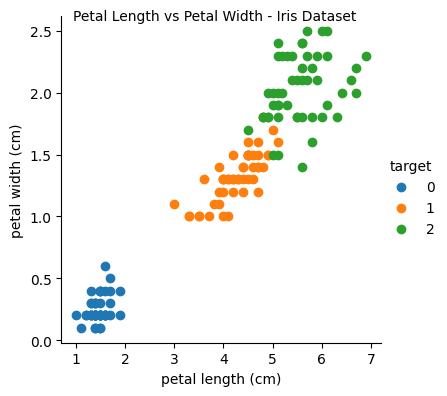

In [ ]:
sns.FacetGrid(iris_df, hue='target', height=4).map(plt.scatter, 'petal length (cm)', 'petal width (cm)').add_legend().fig.suptitle("Petal Length vs Petal Width - Iris Dataset", fontsize=10)
plt.show()

 The scatter plot that visualizes the relationship between the petal length and petal width of the Iris flowers, with different colors representing the three different species (referred to as the "target" variable).

* **Blue dots** (target = 0) represent the Iris setosa species.
* **Orange dots** (target = 1) represent the Iris versicolor species.
* **Green dots** (target = 2) represent the Iris virginica species.

* Iris setosa (blue dots) can be easily distinguished from the other two species based on its smaller petal dimensions.
* There is some overlap between Iris versicolor and Iris virginica in terms of petal length and width, but they still form distinct clusters.

The plot provides a visual representation of how the petal length and width vary among the different species of Iris flowers. It suggests that these features can be used to differentiate between the species, especially for Iris setosa (Blue dots) which has distinctly smaller petal dimensions compared to the other two species.

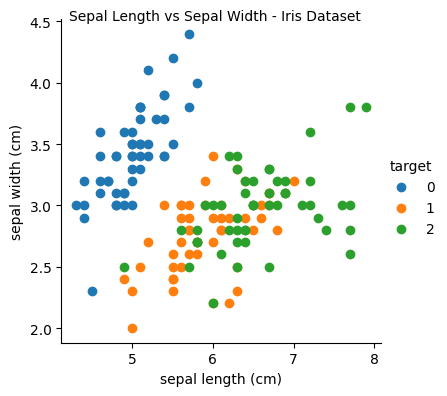

In [ ]:
sns.FacetGrid(iris_df, hue='target', height=4).map(plt.scatter, 'sepal length (cm)', 'sepal width (cm)').add_legend().fig.suptitle("Sepal Length vs Sepal Width - Iris Dataset", fontsize=10)
plt.show()

* Comparing the scatter plot of sepal length and sepal width to the previous plot of petal length and petal width, we can see that the clusters of different flowe species are not as well-separated when considering sepal length and width

* There is significant overlap between the three species, especially between Iris versicolor and Iris virginica.

* Iris setosa (blue points) still forms a distinct cluster, but it is not as tightly grouped as in the previous plot.

* The overlap suggests that sepal length and width alone may not be as effective in distinguishing between the species compared to petal length and width

# 5. Split Train and Test Data

In [ ]:
# We have already extracted X and y from iris
X = iris.data
y = iris.target

In [ ]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=1)

* We've split the data by 70-30% train test ratio.
* So our train set is 0.7% and test size is 0.3%

In [ ]:
print('Train data data', y_train.shape)
print('Test set data', y_test.shape)

Train data data (105,)
 Test set data (45,)


So, we've randomly selected 105 rows to train our data and 45 rows set aside to test the model performance.

# 6. Model Training & Prediction

Assuming k =3

In [ ]:
# Create an instance of KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)

# Train model
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Model prediction
y_pred = knn_model.predict(X_test)
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1])

# 7. Model Evaluation

In [ ]:
# Accuracy score

acc = accuracy_score(y_test, y_pred).round(4)
acc

0.9778

With the accuracy score, we test how our model is performing using (y_test) unseen data versus how it relates with y_pred (our predicted values)

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  0,  0],
       [ 0, 18,  0],
       [ 0,  1, 12]])

In [ ]:
cm_df = pd.DataFrame(data = cm, index = ['Setosa', 'Versicolour', 'Virginica'], columns = ['Setosa', 'Versicolour', 'Virginica'])
cm_df

,Setosa,Versicolour,Virginica
Setosa,14,0,0
Versicolour,0,18,0
Virginica,0,1,12


In [ ]:
cr= classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.95      1.00      0.97        18
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45

